In [97]:
import openpyxl as xl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

wb = xl.load_workbook("dados\\Matriz Modelo - VERSÃO SISTEMA.xlsx", keep_vba=True)
sheet = wb['MATRIZ CONTRATOS (2)']

df = pd.read_excel("dados\\Matriz Modelo - VERSÃO SISTEMA.xlsx", sheet_name='MATRIZ CONTRATOS')


In [98]:
dfMunicipio= df.iloc[6:,1]
dfNota = df.iloc[:,35]
mylist = []
for col in sheet['AJ'][7:]:
     mylist.append(col.value)
dfMunicipio


6                    ABAIRA
7                     ABARE
8                 ACAJUTIBA
9                  ADUSTINA
10                AGUA FRIA
               ...         
418    VITORIA DA CONQUISTA
419                  WAGNER
420               WANDERLEY
421     WENCESLAU GUIMARAES
422             XIQUE-XIQUE
Name: Unnamed: 1, Length: 417, dtype: object

In [99]:
mylist

['=AI8',
 '=AI9',
 '=AI10',
 '=AI11',
 '=AI12',
 '=AI13',
 '=AI14',
 '=AI15',
 '=AI16',
 '=AI17',
 '=AI18',
 '=AI19',
 '=AI20',
 '=AI21',
 '=AI22',
 '=AI23',
 '=AI24',
 '=AI25',
 '=AI26',
 '=AI27',
 '=AI28',
 '=AI29',
 '=AI30',
 '=AI31',
 '=AI32',
 '=AI33',
 '=AI34',
 '=AI35',
 '=AI36',
 '=AI37',
 '=AI38',
 '=AI39',
 '=AI40',
 '=AI41',
 '=AI42',
 '=AI43',
 '=AI44',
 '=AI45',
 '=AI46',
 '=AI47',
 '=AI48',
 '=AI49',
 '=AI50',
 '=AI51',
 '=AI52',
 '=AI53',
 '=AI54',
 '=AI55',
 '=AI56',
 '=AI57',
 '=AI58',
 '=AI59',
 '=AI60',
 '=AI61',
 '=AI62',
 '=AI63',
 '=AI64',
 '=AI65',
 '=AI66',
 '=AI67',
 '=AI68',
 '=AI69',
 '=AI70',
 '=AI71',
 '=AI72',
 '=AI73',
 '=AI74',
 '=AI75',
 '=AI76',
 '=AI77',
 '=AI78',
 '=AI79',
 '=AI80',
 '=AI81',
 '=AI82',
 '=AI83',
 '=AI84',
 '=AI85',
 '=AI86',
 '=AI87',
 '=AI88',
 '=AI89',
 '=AI90',
 '=AI91',
 '=AI92',
 '=AI93',
 '=AI94',
 '=AI95',
 '=AI96',
 '=AI97',
 '=AI98',
 '=AI99',
 '=AI100',
 '=AI101',
 '=AI102',
 '=AI103',
 '=AI104',
 '=AI105',
 '=AI106',
 '=AI

6      2900108
7      2900207
8      2900306
9      2900355
10     2900405
        ...   
418    2933307
419    2933406
420    2933455
421    2933505
422    2933604
Name: MATRIZ MODELO, Length: 417, dtype: object

In [6]:
novo_df = {
    'municipio':dfMunicipio.values,
    'nota':dfNota.values
}

In [7]:
dfPlot = pd.DataFrame(novo_df)
dfPlot

,id,municipio,nota
0,2900108,ABAIRA,66.25
1,2900207,ABARE,64.583333
2,2900306,ACAJUTIBA,73.194444
3,2900355,ADUSTINA,60.138889
4,2900405,AGUA FRIA,89.166667
...,...,...,...
412,2933307,VITORIA DA CONQUISTA,68.333333
413,2933406,WAGNER,76.805556
414,2933455,WANDERLEY,65
415,2933505,WENCESLAU GUIMARAES,81.805556


In [8]:
dfPlot = dfPlot.sort_values(by='nota', ascending=False)
dfPlot

,id,municipio,nota
187,2915601,ITAMARAJU,90.833333
60,2904902,CACHOEIRA,90.0
393,2931905,TUCANO,89.305556
385,2931202,TAPEROA,89.166667
4,2900405,AGUA FRIA,89.166667
...,...,...,...
271,2922409,MUTUIPE,40.416667
201,2916906,ITIRUCU,40.277778
237,2919603,MACAJUBA,40.277778
335,2927309,SALINAS DA MARGARIDA,36.944444


In [9]:
dftop50 = dfPlot.head(50)

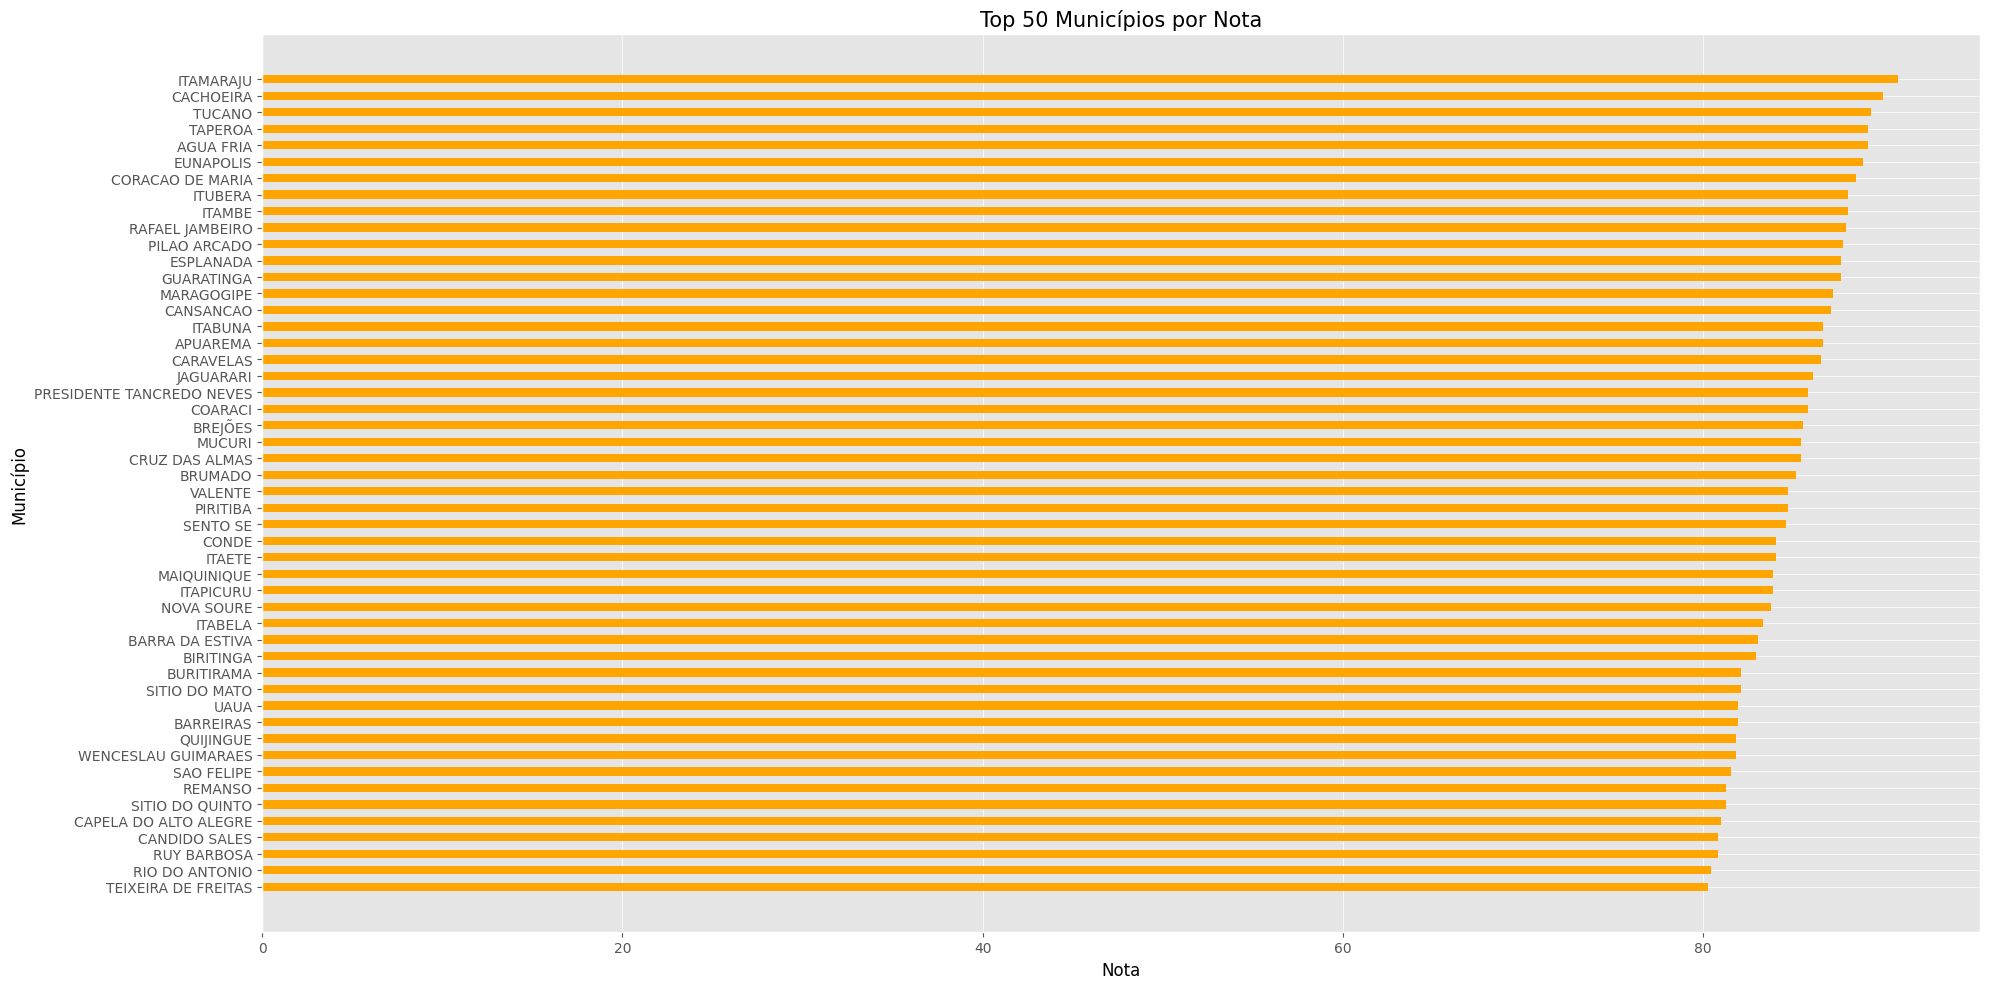

In [27]:
# Definir um estilo com fundo escuro
plt.style.use('ggplot')


# Selecionar os primeiros 50 municípios
dfTop50 = dfPlot.head(50)

# Definir o tamanho da figura (largura, altura)
plt.figure(figsize=(20, 10))

# Criar o gráfico de barras horizontais com barras mais largas
plt.barh(dfTop50['municipio'], dfTop50['nota'], color='orange', height=0.5,)

# Inverter o eixo y para mostrar o maior no topo
plt.gca().invert_yaxis()

# Configurações adicionais
plt.xlabel('Nota', fontsize=12, color='black')
plt.ylabel('Município', fontsize=12, color='black')
plt.title('Top 50 Municípios por Nota', fontsize=15, color='black')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
graf = plt.show()

In [29]:
graf

In [71]:
import folium
import pandas as pd

# Exemplo: DataFrame com latitude e longitude para cada município
# Certifique-se de ter as coordenadas de latitude e longitude para os municípios
# Exemplo fictício para demonstração, troque pelos dados reais.
data = {
    'municipio': dfMunicipio,
    'nota': dfNota,
    'latitude': df,
    'longitude': [-38.5014, -38.5300, -38.5100]
}

# Criar um DataFrame com essas informações
df_municipios = pd.DataFrame(data)

# Definir o ponto inicial no mapa (centralizando no primeiro município)
mapa = folium.Map(location=[df_municipios['latitude'][0], df_municipios['longitude'][0]], zoom_start=6)

# Adicionar marcadores ao mapa
for index, row in df_municipios.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['municipio']}: {row['nota']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(mapa)

# Salvar o mapa em um arquivo HTML
mapa.save('mapa_municipios.html')

# Exibir o mapa diretamente (se você estiver em um ambiente Jupyter)
mapa
